In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [2]:
train_dir = 'Emotion2/train'
valid_dir = 'Emotion2/test'

In [3]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, rotation_range=0.2, zoom_range=0.2, shear_range=0.2)
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=(48, 48), batch_size=32, color_mode='grayscale', class_mode='categorical')
valid_data = valid_gen.flow_from_directory(valid_dir, target_size=(48, 48), batch_size=32, color_mode='grayscale', class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Exploratory Data Analysis (EDA)

In [4]:
class_name = list(train_data.class_indices.keys())
class_name

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

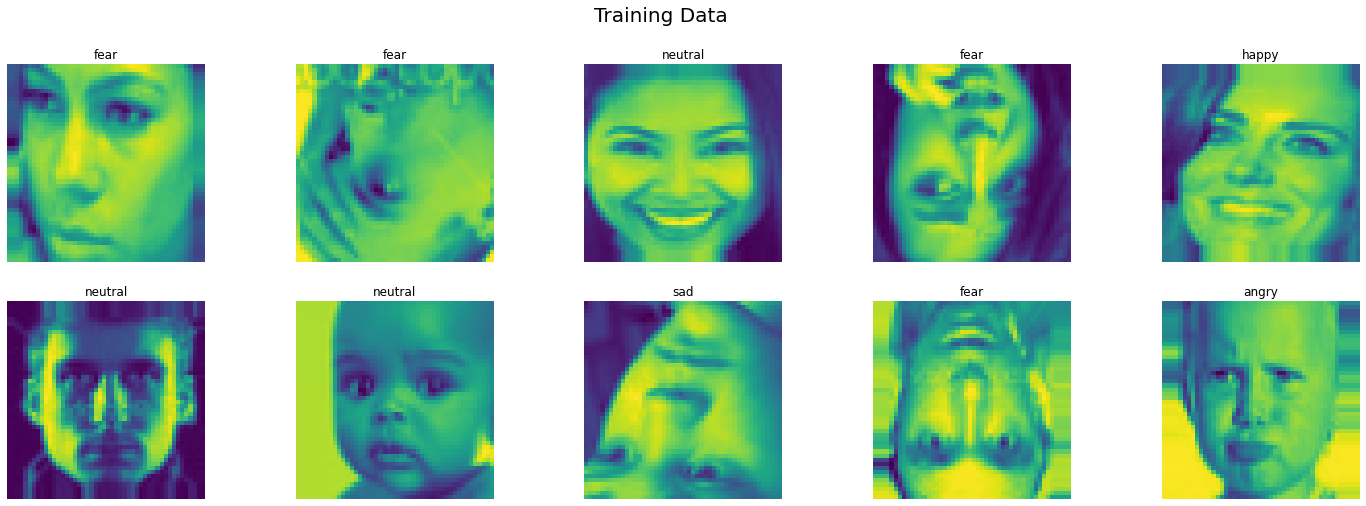

In [5]:
plt.figure(figsize=(25, 8))
plt.suptitle('Training Data', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_data[i][0][0])
    plt.title(class_name[np.argmax(train_data[i][1][0])])
    plt.axis('off')
plt.show()

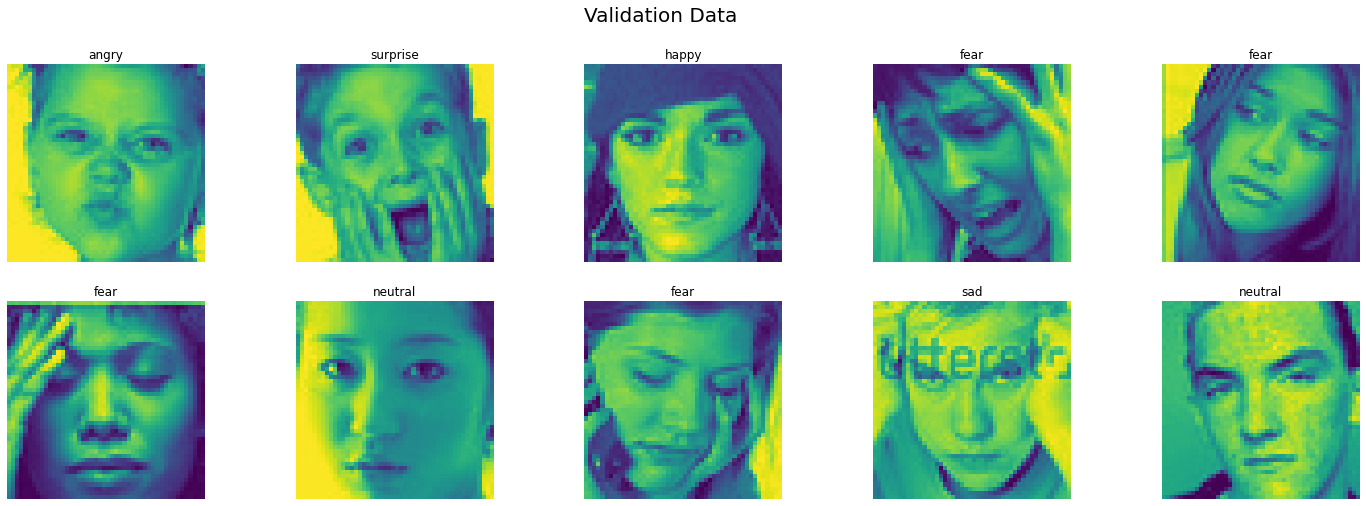

In [6]:
plt.figure(figsize=(25, 8))
plt.suptitle('Validation Data', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(valid_data[i][0][0])
    plt.title(class_name[np.argmax(valid_data[i][1][0])])
    plt.axis('off')
plt.show()

In [7]:
train_data[0][0][0].shape

(48, 48, 1)

## Modeling

In [8]:
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True), keras.callbacks.ModelCheckpoint('Emotion2_model.h5', monitor='val_loss', save_best_only=True)]

In [14]:
model = Sequential()
# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.25))

# Fully Connected Layer 2
model.add(Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.25))

# Fully Connected Layer 3
model.add(Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_data, validation_data=valid_data, epochs=30, callbacks=callback)

Epoch 1/30
898/898 [==============================] - 47s 51ms/step - loss: 2.0972 - accuracy: 0.2133 - val_loss: 1.7786 - val_accuracy: 0.2715
Epoch 2/30
898/898 [==============================] - 46s 51ms/step - loss: 1.8603 - accuracy: 0.2493 - val_loss: 1.7135 - val_accuracy: 0.2997
Epoch 3/30
898/898 [==============================] - 45s 51ms/step - loss: 1.7534 - accuracy: 0.2982 - val_loss: 1.6970 - val_accuracy: 0.3192
Epoch 4/30
898/898 [==============================] - 47s 52ms/step - loss: 1.6707 - accuracy: 0.3379 - val_loss: 1.6437 - val_accuracy: 0.3553
Epoch 5/30
898/898 [==============================] - 46s 52ms/step - loss: 1.6077 - accuracy: 0.3706 - val_loss: 1.5550 - val_accuracy: 0.4018
Epoch 6/30
898/898 [==============================] - 48s 54ms/step - loss: 1.5613 - accuracy: 0.3911 - val_loss: 1.4973 - val_accuracy: 0.4294
Epoch 7/30
898/898 [==============================] - 46s 52ms/step - loss: 1.5229 - accuracy: 0.4097 - val_loss: 1.5434 - val_accuracy:

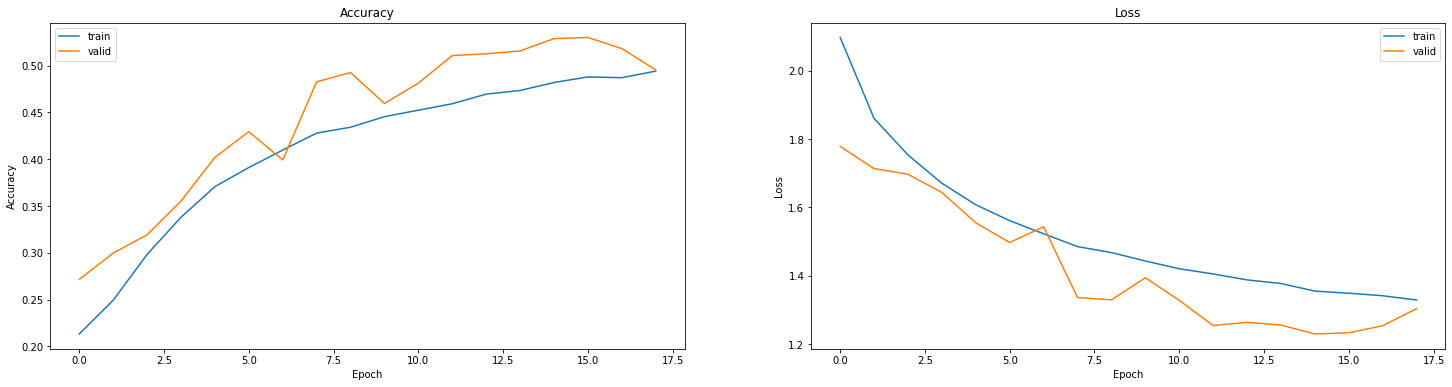

In [16]:
metrics = pd.DataFrame(history.history)

plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics['accuracy'])
plt.plot(metrics['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])
plt.subplot(1, 2, 2)
plt.plot(metrics['loss'])
plt.plot(metrics['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])
plt.show()

In [17]:
img1 = tf.keras.preprocessing.image.load_img('PrivateTest_95094.jpg', target_size=(48, 48))
img1 = tf.keras.preprocessing.image.img_to_array(img1) / 255.
img1 = tf.image.rgb_to_grayscale(img1)
img1_pred = np.expand_dims(img1, axis=0)
img1_pred = model.predict(img1_pred)

img2 = tf.keras.preprocessing.image.load_img('PrivateTest_731447.jpg', target_size=(48, 48))
img2 = tf.keras.preprocessing.image.img_to_array(img2) / 255.
img2 = tf.image.rgb_to_grayscale(img2)
img2_pred = np.expand_dims(img2, axis=0)
img2_pred = model.predict(img2_pred)

img3 = tf.keras.preprocessing.image.load_img('PrivateTest_2017514.jpg', target_size=(48, 48))
img3 = tf.keras.preprocessing.image.img_to_array(img3) / 255.
img3 = tf.image.rgb_to_grayscale(img3)
img3_pred = np.expand_dims(img3, axis=0)
img3_pred = model.predict(img3_pred)

(-0.5, 47.5, 47.5, -0.5)

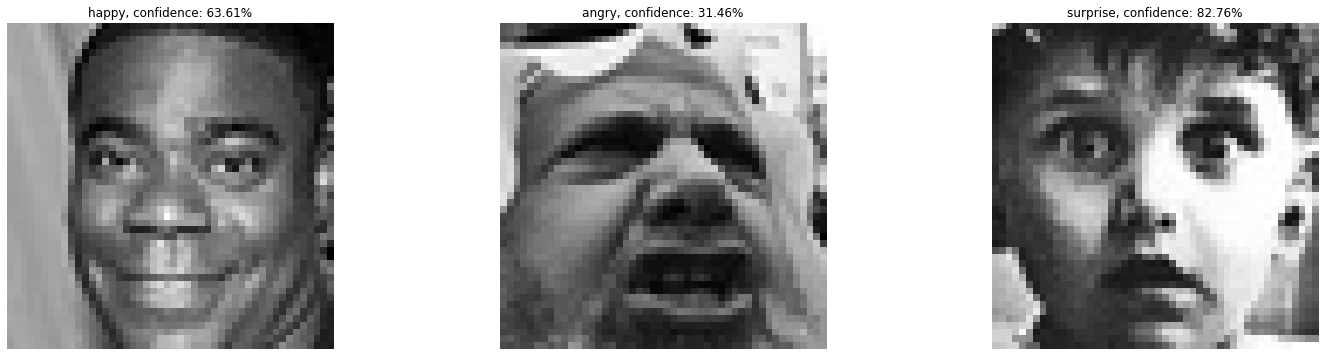

In [18]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title(f"{class_name[np.argmax(img1_pred)]}, confidence: {(img1_pred[0][np.argmax(img1_pred)]) * 100:.2f}%")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title(f"{class_name[np.argmax(img2_pred)]}, confidence: {(img2_pred[0][np.argmax(img2_pred)]) * 100:.2f}%")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')
plt.title(f"{class_name[np.argmax(img3_pred)]}, confidence: {(img3_pred[0][np.argmax(img3_pred)]) * 100:.2f}%")
plt.axis('off')